[Reference](https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a)

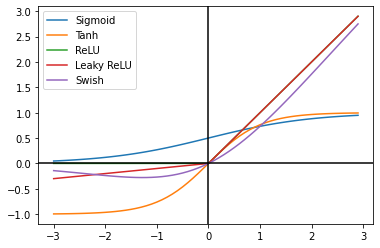

In [1]:
# Importing the required libraries
import math
import matplotlib.pyplot as plt
import numpy as np

# The definition of activation functions mathematically
# Sigmoid Function
def sigmoid(x):
    a = []
    for i in x:
        a.append(1/(1+math.exp(-i)))
    return a
# Hyperbolic Tanjant Function
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)
# ReLU Function
def re(x):
    b = []
    for i in x:
        if i<0:
            b.append(0)
        else:
            b.append(i)
    return b
# Leaky ReLU Function
def lr(x):
    b = []
    for i in x:
        if i<0:
            b.append(i/10)
        else:
            b.append(i)
    return b
  
# Determining the intervals to be created for the graph
x = np.arange(-3., 3., 0.1)
sig = sigmoid(x)
tanh = tanh(x)
relu = re(x)
leaky_relu = lr(x)
swish = sig*x

# Displaying the functions
line_1, = plt.plot(x,sig, label='Sigmoid')
line_2, = plt.plot(x,tanh, label='Tanh')
line_3, = plt.plot(x,relu, label='ReLU')
line_4, = plt.plot(x,leaky_relu, label='Leaky ReLU')
line_5, = plt.plot(x,swish, label='Swish')
plt.legend(handles=[line_1, line_2, line_3, line_4, line_5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10904082924350320947]

In [3]:
!pip install -q keras

In [13]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


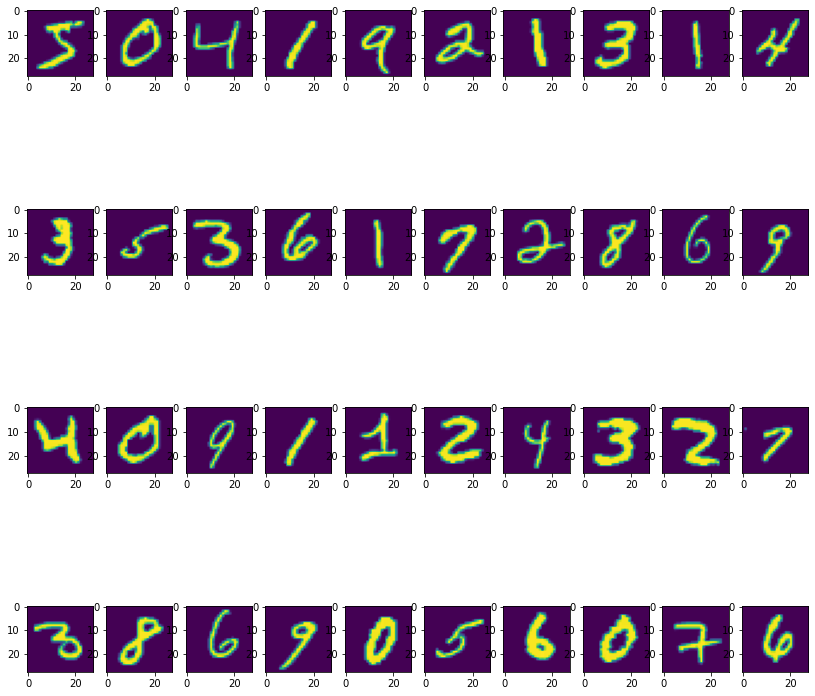

In [6]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

In [7]:
batch_size = 128 # Batch-Size
num_classes = 10 # Number of Class
epochs = 20 # Number of epoch
w_l2 = 1e-5 # Initial

In [8]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [9]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors into binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)       

In [15]:
hist_sigmoid=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 181s 384ms/step - loss: 0.8565 - accuracy: 0.7674 - val_loss: 0.2912 - val_accuracy: 0.9509
Epoch 2/20
469/469 [==============================] - 186s 397ms/step - loss: 0.2233 - accuracy: 0.9463 - val_loss: 0.0945 - val_accuracy: 0.9766
Epoch 3/20
469/469 [==============================] - 180s 384ms/step - loss: 0.1509 - accuracy: 0.9619 - val_loss: 0.1938 - val_accuracy: 0.9385
Epoch 4/20
469/469 [==============================] - 181s 385ms/step - loss: 0.1247 - accuracy: 0.9671 - val_loss: 0.1267 - val_accuracy: 0.9645
Epoch 5/20
469/469 [==============================] - 181s 385ms/step - loss: 0.1081 - accuracy: 0.9728 - val_loss: 0.0856 - val_accuracy: 0.9790
Epoch 6/20
469/469 [==============================] - 180s 384ms/step - loss: 0.0982 - accuracy: 0.9760 - val_loss: 0.0691 - val_accuracy: 0.9832
Epoch 7/20
469/469 [==============================] - 180s 384ms/step - loss: 0.0891 - accuracy: 0.9787 - val_loss: 0.0719 -

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)       

In [17]:
hist_tanh=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 182s 387ms/step - loss: 0.3265 - accuracy: 0.9023 - val_loss: 0.1590 - val_accuracy: 0.9478
Epoch 2/20
469/469 [==============================] - 182s 387ms/step - loss: 0.0840 - accuracy: 0.9773 - val_loss: 0.0598 - val_accuracy: 0.9831
Epoch 3/20
469/469 [==============================] - 181s 387ms/step - loss: 0.0678 - accuracy: 0.9808 - val_loss: 0.0665 - val_accuracy: 0.9791
Epoch 4/20
469/469 [==============================] - 181s 386ms/step - loss: 0.0577 - accuracy: 0.9847 - val_loss: 0.0558 - val_accuracy: 0.9861
Epoch 5/20
469/469 [==============================] - 181s 386ms/step - loss: 0.0554 - accuracy: 0.9859 - val_loss: 0.4350 - val_accuracy: 0.8725
Epoch 6/20
469/469 [==============================] - 181s 386ms/step - loss: 0.0523 - accuracy: 0.9874 - val_loss: 0.3969 - val_accuracy: 0.8678
Epoch 7/20
469/469 [==============================] - 181s 387ms/step - loss: 0.0503 - accuracy: 0.9879 - val_loss: 0.0523 -

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)       

In [19]:
hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 182s 386ms/step - loss: 0.3329 - accuracy: 0.9052 - val_loss: 0.2100 - val_accuracy: 0.9434
Epoch 2/20
469/469 [==============================] - 180s 384ms/step - loss: 0.0772 - accuracy: 0.9799 - val_loss: 0.0499 - val_accuracy: 0.9869
Epoch 3/20
469/469 [==============================] - 181s 385ms/step - loss: 0.0600 - accuracy: 0.9843 - val_loss: 0.0446 - val_accuracy: 0.9874
Epoch 4/20
469/469 [==============================] - 181s 386ms/step - loss: 0.0542 - accuracy: 0.9865 - val_loss: 0.0497 - val_accuracy: 0.9873
Epoch 5/20
469/469 [==============================] - 181s 386ms/step - loss: 0.0493 - accuracy: 0.9885 - val_loss: 0.0388 - val_accuracy: 0.9905
Epoch 6/20
469/469 [==============================] - 181s 386ms/step - loss: 0.0443 - accuracy: 0.9894 - val_loss: 0.0395 - val_accuracy: 0.9913
Epoch 7/20
469/469 [==============================] - 181s 386ms/step - loss: 0.0477 - accuracy: 0.9892 - val_loss: 0.0414 -

In [ ]:
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.001))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

In [22]:
hist_LeakyReLU=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 209s 444ms/step - loss: 0.3405 - accuracy: 0.8970 - val_loss: 0.1249 - val_accuracy: 0.9626
Epoch 2/20
469/469 [==============================] - 208s 443ms/step - loss: 0.0840 - accuracy: 0.9766 - val_loss: 0.0586 - val_accuracy: 0.9826
Epoch 3/20
469/469 [==============================] - 208s 443ms/step - loss: 0.0646 - accuracy: 0.9831 - val_loss: 0.0507 - val_accuracy: 0.9851
Epoch 4/20
469/469 [==============================] - 207s 442ms/step - loss: 0.0564 - accuracy: 0.9847 - val_loss: 0.0640 - val_accuracy: 0.9817
Epoch 5/20
469/469 [==============================] - 207s 442ms/step - loss: 0.0504 - accuracy: 0.9870 - val_loss: 0.0497 - val_accuracy: 0.9879
Epoch 6/20
469/469 [==============================] - 208s 444ms/step - loss: 0.0484 - accuracy: 0.9881 - val_loss: 0.0432 - val_accuracy: 0.9901
Epoch 7/20
469/469 [==============================] - 208s 444ms/step - loss: 0.0485 - accuracy: 0.9889 - val_loss: 0.0455 -

In [23]:
def swish(x):
    return x * K.sigmoid(x)
    # return x * (1/(1 + K.exp(-x)))

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)       

In [25]:
hist_swish=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 197s 418ms/step - loss: 0.3101 - accuracy: 0.9124 - val_loss: 0.0613 - val_accuracy: 0.9837
Epoch 2/20
469/469 [==============================] - 196s 419ms/step - loss: 0.0751 - accuracy: 0.9800 - val_loss: 0.0505 - val_accuracy: 0.9859
Epoch 3/20
469/469 [==============================] - 196s 417ms/step - loss: 0.0571 - accuracy: 0.9852 - val_loss: 0.0441 - val_accuracy: 0.9890
Epoch 4/20
469/469 [==============================] - 195s 416ms/step - loss: 0.0520 - accuracy: 0.9874 - val_loss: 0.0401 - val_accuracy: 0.9910
Epoch 5/20
469/469 [==============================] - 194s 413ms/step - loss: 0.0469 - accuracy: 0.9890 - val_loss: 0.0456 - val_accuracy: 0.9891
Epoch 6/20
469/469 [==============================] - 196s 419ms/step - loss: 0.0398 - accuracy: 0.9918 - val_loss: 0.0417 - val_accuracy: 0.9913
Epoch 7/20
469/469 [==============================] - 194s 414ms/step - loss: 0.0395 - accuracy: 0.9922 - val_loss: 0.0458 -

In [26]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'acc': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['Sigmoid', 'tanh', 'ReLU', 'Leaky_ReLU', 'Swish'], loc=loc)  

    plt.show()

In [27]:
hists = [hist_sigmoid, hist_tanh, hist_relu, hist_LeakyReLU, hist_swish]

KeyError: ignored

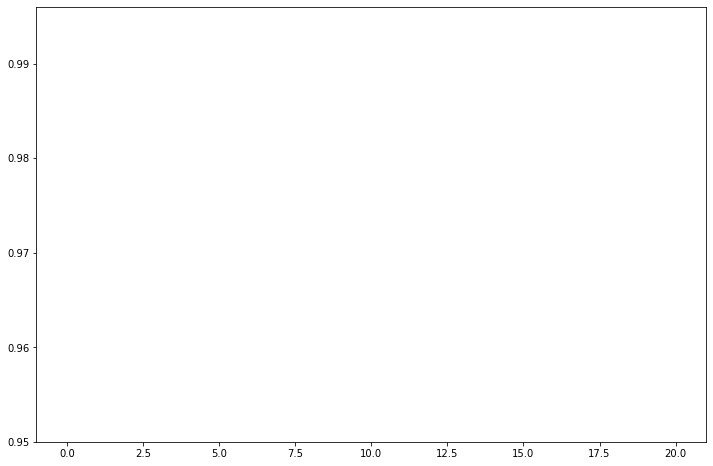

In [28]:
plot_history(hists, attribute='val_acc',axis=(-1,21,0.95,0.9960), loc='lower right')

In [ ]:
plot_history(hists, attribute='acc', axis=(-1,21,0.94,1.01), loc='lower right')

In [ ]:
plot_history(hists, attribute='val_loss', axis=(-1,21,0.02,0.18), loc='upper right')

In [ ]:
plot_history(hists, attribute='loss', axis=(-1,21,0.009,0.25), loc='upper right')